## Basit Doğrusal Regresyon

In [1]:
import pandas as pd
import numpy as np

ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df  = df.iloc[:,1:len(df)]

#or 
#ad = pd.read_csv("Advertising.csv",usecols=[1,2,3,4])

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.isnull().values.any()

False

In [6]:
df.corr()

#Bağımsız değişkenler(TV,radio,newpaper) arasında korelasyon olmamalı
#TV ile satışlar arasında pozitif yönlü güçlü bir korelasyon olduğu görülüyor(r = 0.78)

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
import seaborn as sns
sns.pairplot(df,kind="reg");

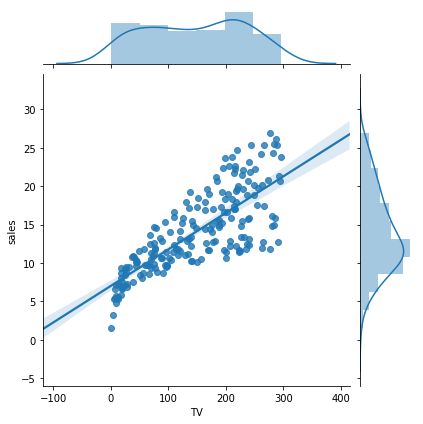

In [8]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

In [9]:
#Stats models ile modelleme

import statsmodels.api as sm

x = df[["TV"]]
x[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
x = sm.add_constant(x)

C:\Users\Kerem\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
x[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [12]:
y = df["sales"]
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [13]:
lm = sm.OLS(y,x)

In [14]:
model = lm.fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        11:51:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#const:7.0326 = b0
#b1 = 0.0475

In [17]:
import statsmodels.formula.api as smf

lm = smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        11:51:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [19]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [20]:
model.params[0]

7.032593549127696

In [21]:
model.params[1]

0.047536640433019764

In [22]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [23]:
model.f_pvalue

1.4673897001947095e-42

In [24]:
model.mse_model
#model başarısını ölçmek için kullanılıyor.(hata kareler ortalaması).TV ortalamasından
#çok yüksek olduğu için model başarısı çok düşüktür.

3314.6181668686486

In [25]:
#Modelin denklemi

print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


NameError: name 'plt' is not defined

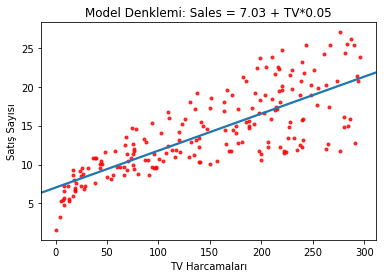

In [26]:
#Modeling grafigi

g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [27]:
#scikit-learn ile model kurma

from sklearn.linear_model import LinearRegression

In [28]:
x = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(x,y)
model.intercept_
model.coef_

array([0.04753664])

In [29]:
#r2 değeri
model.score(x,y)

0.611875050850071

In [30]:
model.predict(x)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
#Tahmin

#Model denlemi:

#Sales = 7.03 + TV*0.04

#Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur ? 

In [31]:
7.03 + 30*0.04

8.23

In [32]:
model.predict([[30]])

array([8.45869276])

In [34]:
yeni_veri=[[5],[90],[200]]
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

In [36]:
#Artıklar ve Makine Öğrenmesindeki Önemi

from sklearn.metrics import mean_squared_error,r2_score

In [39]:
lm = smf.ols("sales ~ TV",df)
model = lm.fit()


In [40]:
mse = mean_squared_error(y,model.fittedvalues)

In [41]:
mse

10.512652915656757

In [42]:
rmse = np.sqrt(mse)

In [43]:
rmse

3.2423221486546887

In [44]:
reg.predict(x)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [45]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [48]:
k_t = pd.DataFrame({"gercek_y":y[:10],
                   "tahmin_y":reg.predict(x)[:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [49]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [50]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [51]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [52]:
np.mean(k_t["hata_kare"])

9.290350329638105

In [53]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996776

In [55]:
model.resid[:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

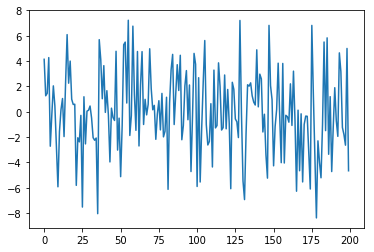

In [57]:
import matplotlib.pyplot as plt

plt.plot(model.resid)